<a href="https://colab.research.google.com/github/Vannod/Simulacion-I/blob/main/P2/Aceptaci%C3%B3n_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de aceptación y rechazo

Alumna: Ortiz Diaz Vania Yael

## Librerias

In [10]:
# Importamos las librerias que usaremos para el programa
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import cumtrapz

## Método

In [11]:
# Definimos nuestra función objetivo
def f(x):
  return 30*x * (1 - x)**3

# Definimos nuestra función de densidad de probabilidad g
def g(x):
  return (19*x * (1 - x)**3) / 2

# Definimos una constante c
c = max(f(x) / g(x) for x in np.linspace(-4, 4, 1000))

# Definimos una función para calcular Método aceptación y rechazo
def AR(n):
    Lista = []
    while len(Lista) < n:
        # Generamos dos muestras uniformes
        U1 = rnd.uniform(0, 1)
        U2 = rnd.uniform(0, 1)
        R = U2 / c * g(U1)
        # Condición de Aceptación o rechazo para cada muestra
        if U1 * f(R) <= g(U1):
            Lista.append(R)
    return Lista

Resultados = AR(10000)

## Función de densidad de probabilidad

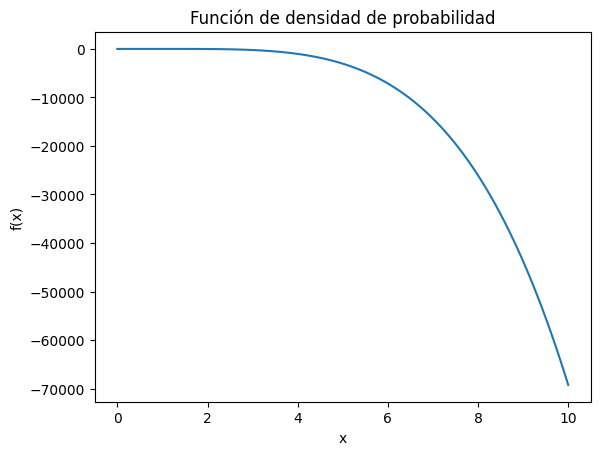

In [12]:
x = np.linspace(0, 10, 100)
fdp = g(x) # Calcula la Función de densidad de probabilidad para diferentes valores de x

# Grafica de la Función de densidad de probabilidad
plt.plot(x, fdp)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de densidad de probabilidad')
plt.show()


## Función acumulativa

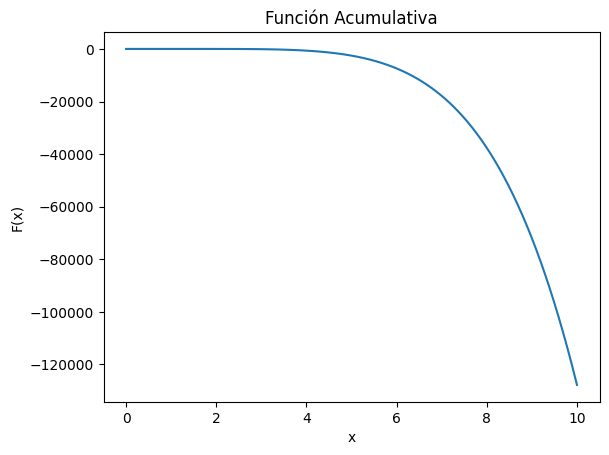

In [14]:
x = np.linspace(0, 10, 100)
fda = cumtrapz(fdp, x, initial=0) # Calcula la Función Acumulativa para diferentes valores de x

# Grafica de la Función Acumulativa
plt.plot(x, fda)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función Acumulativa')
plt.show()

## Histograma de la muestra

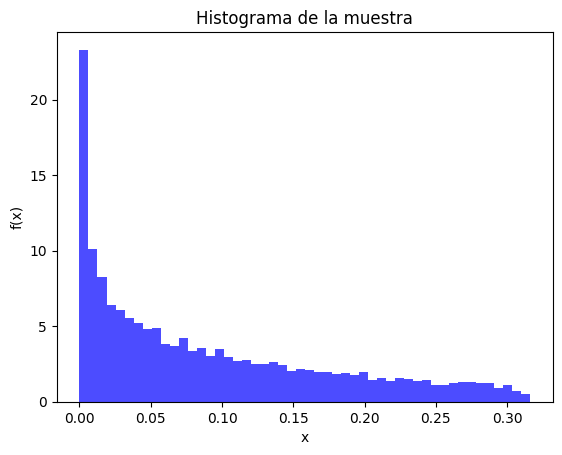

In [9]:
# Usamos la mustra resultante de nuestro método
plt.hist(Resultados, bins=50, density=True, color='blue', alpha=0.7)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Histograma de la muestra')
plt.show()